Original values:
  Shape: torch.Size([1000])
  Min: 0.00, Max: 1.00
  Mean: 0.50, Std: 0.28

Min-Max Normalization:
  Min: 0.00, Max: 1.00
  Mean: 0.50, Std: 0.28

Standardization (Z-score):
  Min: -1.82, Max: 1.81
  Mean: -0.00, Std: 1.00



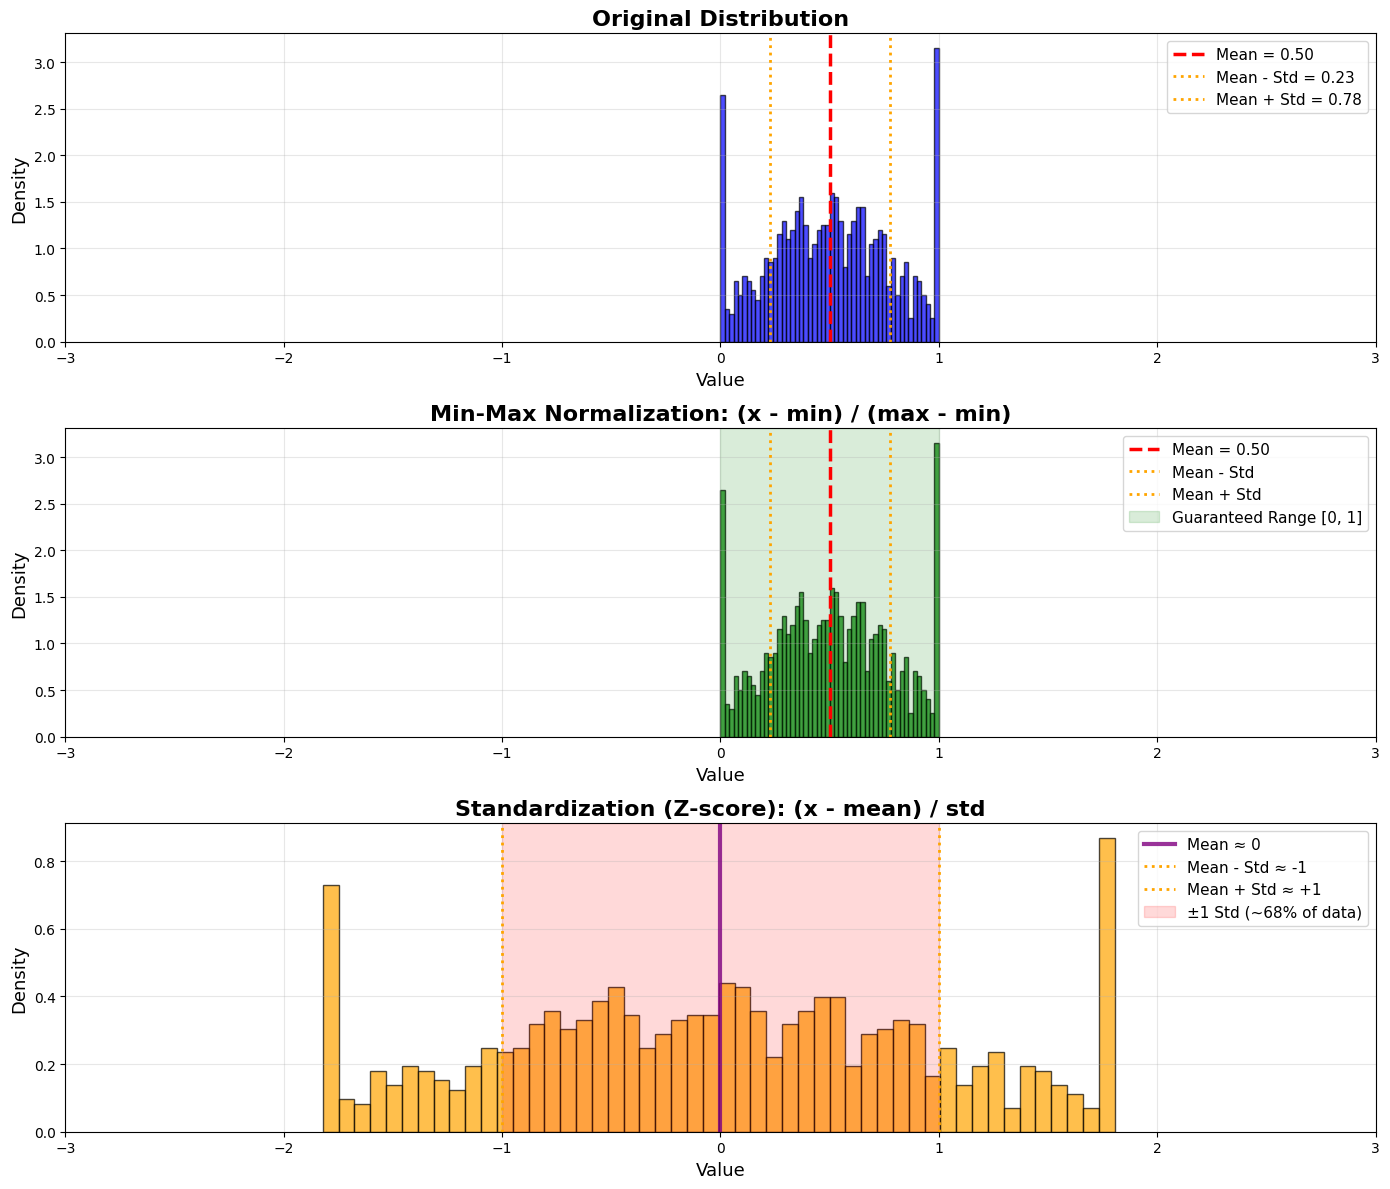

KEY DIFFERENCES:
Min-Max Normalization:
  ✓ Range is ALWAYS [0, 1]
  ✗ Mean can be anything (here: 0.50)
  ✗ Std can be anything (here: 0.28)

Standardization (Z-score):
  ✓ Mean is ALWAYS ≈ 0 (here: -0.000000)
  ✓ Std is ALWAYS ≈ 1 (here: 1.000000)
  ✗ Range can be anything (here: [-1.82, 1.81])

Notice: Standardization preserves the SHAPE of the distribution
        but centers it at 0 with unit variance!


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Larger dataset: 1000 samples from a realistic distribution
# Simulating pixel-like data with some structure
torch.manual_seed(42)
pixels = torch.clamp(torch.randn(1000) * 0.3 + 0.5, 0, 1)  # Roughly centered around 0.5

print("Original values:")
print(f"  Shape: {pixels.shape}")
print(f"  Min: {pixels.min():.2f}, Max: {pixels.max():.2f}")
print(f"  Mean: {pixels.mean():.2f}, Std: {pixels.std():.2f}")
print()

# ===== Min-Max Normalization =====
min_val, max_val = pixels.min(), pixels.max()
min_max_normalized = (pixels - min_val) / (max_val - min_val)

print("Min-Max Normalization:")
print(f"  Min: {min_max_normalized.min():.2f}, Max: {min_max_normalized.max():.2f}")
print(f"  Mean: {min_max_normalized.mean():.2f}, Std: {min_max_normalized.std():.2f}")
print()

# ===== Standardization (Z-score) =====
mean, std = pixels.mean(), pixels.std()
standardized = (pixels - mean) / std

print("Standardization (Z-score):")
print(f"  Min: {standardized.min():.2f}, Max: {standardized.max():.2f}")
print(f"  Mean: {standardized.mean():.2f}, Std: {standardized.std():.2f}")
print()

# ===== Visualization =====
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Convert to numpy for plotting
pixels_np = pixels.numpy()
min_max_np = min_max_normalized.numpy()
std_np = standardized.numpy()

# Plot 1: Original Distribution
ax1 = axes[0]
ax1.hist(pixels_np, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
ax1.axvline(pixels.mean().item(), color='red', linestyle='--', linewidth=2.5, 
            label=f'Mean = {pixels.mean():.2f}')
ax1.axvline(pixels.mean().item() - pixels.std().item(), color='orange', linestyle=':', 
            linewidth=2, label=f'Mean - Std = {(pixels.mean() - pixels.std()):.2f}')
ax1.axvline(pixels.mean().item() + pixels.std().item(), color='orange', linestyle=':', 
            linewidth=2, label=f'Mean + Std = {(pixels.mean() + pixels.std()):.2f}')
ax1.set_xlim(-3, 3)
ax1.set_title('Original Distribution', fontsize=16, fontweight='bold')
ax1.set_xlabel('Value', fontsize=13)
ax1.set_ylabel('Density', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11, loc='upper right')

# Plot 2: Min-Max Normalization
ax2 = axes[1]
ax2.hist(min_max_np, bins=50, alpha=0.7, color='green', edgecolor='black', density=True)
ax2.axvline(min_max_normalized.mean().item(), color='red', linestyle='--', linewidth=2.5, 
            label=f'Mean = {min_max_normalized.mean():.2f}')
ax2.axvline(min_max_normalized.mean().item() - min_max_normalized.std().item(), color='orange', 
            linestyle=':', linewidth=2, label=f'Mean - Std')
ax2.axvline(min_max_normalized.mean().item() + min_max_normalized.std().item(), color='orange', 
            linestyle=':', linewidth=2, label=f'Mean + Std')
ax2.axvspan(0, 1, alpha=0.15, color='green', label='Guaranteed Range [0, 1]')
ax2.set_xlim(-3, 3)
ax2.set_title('Min-Max Normalization: (x - min) / (max - min)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Value', fontsize=13)
ax2.set_ylabel('Density', fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11, loc='upper right')

# Plot 3: Standardization (Z-score)
ax3 = axes[2]
ax3.hist(std_np, bins=50, alpha=0.7, color='orange', edgecolor='black', density=True)
ax3.axvline(0, color='purple', linestyle='-', linewidth=3, alpha=0.8, label='Mean ≈ 0')
ax3.axvline(-1, color='orange', linestyle=':', linewidth=2, label='Mean - Std ≈ -1')
ax3.axvline(1, color='orange', linestyle=':', linewidth=2, label='Mean + Std ≈ +1')
ax3.axvspan(-1, 1, alpha=0.15, color='red', label='±1 Std (~68% of data)')
ax3.set_xlim(-3, 3)
ax3.set_title('Standardization (Z-score): (x - mean) / std', fontsize=16, fontweight='bold')
ax3.set_xlabel('Value', fontsize=13)
ax3.set_ylabel('Density', fontsize=13)
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

# ===== Key Difference Summary =====
print("="*60)
print("KEY DIFFERENCES:")
print("="*60)
print(f"Min-Max Normalization:")
print(f"  ✓ Range is ALWAYS [0, 1]")
print(f"  ✗ Mean can be anything (here: {min_max_normalized.mean():.2f})")
print(f"  ✗ Std can be anything (here: {min_max_normalized.std():.2f})")
print()
print(f"Standardization (Z-score):")
print(f"  ✓ Mean is ALWAYS ≈ 0 (here: {standardized.mean():.6f})")
print(f"  ✓ Std is ALWAYS ≈ 1 (here: {standardized.std():.6f})")
print(f"  ✗ Range can be anything (here: [{standardized.min():.2f}, {standardized.max():.2f}])")
print()
print("Notice: Standardization preserves the SHAPE of the distribution")
print("        but centers it at 0 with unit variance!")
print("="*60)